<a href="https://colab.research.google.com/github/StojanovicIvana/SpatialDatabasesProject/blob/main/AnalysisAndPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlflow
!pip install catboost
!pip install --upgrade xgboost
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
  inflating: dataset.csv             


In [ ]:
taxis=pd.read_csv("dataset.csv", header=0)
taxis.shape 

(5326054, 23)

In [ ]:
taxis.rename(columns = {'Dropoff Centroid  Location':'Dropoff Centroid Location'}, inplace = True)

In [ ]:
import plotly.express as px
serija.loc[serija.values < 10000] = 'Other company'
fig = px.pie(serija, values=serija.values, names=serija.index, title='Taxi company')
fig.show()

In [ ]:
serija=taxis['Company'].value_counts()

In [ ]:
taxis['Tips'].value_counts()

0.00     2629132
2.00      323721
3.00      213974
4.00      104431
5.00      101327
          ...   
49.19          1
16.64          1
47.90          1
23.57          1
66.25          1
Name: Tips, Length: 3261, dtype: int64

In [ ]:
taxis['Company'].value_counts()

Flash Cab                               1212983
Taxi Affiliation Services               1120065
Sun Taxi                                 602720
City Service                             486362
Chicago Independents                     266273
Taxicab Insurance Agency, LLC            234587
Medallion Leasin                         227084
Taxicab Insurance Agency Llc             208122
Globe Taxi                               202733
Star North Taxi Management Llc           122424
Blue Ribbon Taxi Association             118333
Choice Taxi Association                  106719
Top Cab Affiliation                       93750
5 Star Taxi                               92358
24 Seven Taxi                             55912
U Taxicab                                 49586
Blue Ribbon Taxi Association Inc.         36990
Chicago Taxicab                           20573
Patriot Taxi Dba Peace Taxi Associat      18153
Koam Taxi Association                      9429
312 Medallion Management Corp           

In [ ]:
taxis.groupby(['Pickup Centroid Location','Dropoff Centroid Location']).size().sort_values(ascending=False)

Pickup Centroid Location              Dropoff Centroid Location           
POINT (-87.6333080367 41.899602111)   POINT (-87.6333080367 41.899602111)     155533
                                      POINT (-87.6494887289 41.9226862843)     53202
                                      POINT (-87.6559981815 41.9442266014)     52853
POINT (-87.9030396611 41.9790708201)  POINT (-87.9030396611 41.9790708201)     51735
POINT (-87.6333080367 41.899602111)   POINT (-87.6251921424 41.8788655841)     45636
                                                                               ...  
POINT (-87.6462934762 41.9290776551)  POINT (-87.6753116216 41.906025969)          1
                                      POINT (-87.6750856208 41.8704150003)         1
                                      POINT (-87.6716536214 41.8786674201)         1
                                      POINT (-87.665676837 41.9287630064)          1
POINT (-87.642648998 41.8792550844)   POINT (-87.7123574755 41.9336759885) 

In [ ]:
taxis.loc[((taxis['Pickup Centroid Location'] == 'POINT (-87.9030396611 41.9790708201)') & (taxis['Dropoff Centroid Location'] == 'POINT (-87.9030396611 41.9790708201)'))].groupby(['Company']).size().sort_values(ascending=False)   

Company
Taxi Affiliation Services               12690
Flash Cab                                6057
Sun Taxi                                 5920
Taxicab Insurance Agency, LLC            4751
City Service                             4620
Chicago Independents                     2891
Taxicab Insurance Agency Llc             2582
Medallion Leasin                         1863
Globe Taxi                               1487
Star North Taxi Management Llc           1446
Choice Taxi Association                  1407
Top Cab Affiliation                      1374
Blue Ribbon Taxi Association             1034
5 Star Taxi                              1006
U Taxicab                                 779
Blue Ribbon Taxi Association Inc.         447
312 Medallion Management Corp             315
24 Seven Taxi                             216
Metro Jet Taxi A.                         182
Chicago Taxicab                           181
Setare Inc                                 87
Patriot Taxi Dba Peace Tax

In [ ]:
taxis.loc[((taxis['Pickup Centroid Location'] == 'POINT (-87.6333080367 41.899602111)') & (taxis['Dropoff Centroid Location'] == 'POINT (-87.6333080367 41.899602111)'))]

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
13,50719da0933d6056acca25c91c253012288c70c6,d9293712880e8a69bed187b718a3f5ef512c5263984006...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,501.0,0.65,NaN,NaN,8.0,8.0,...,2.0,8.25,Cash,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
21,ba36a5b8ac76e4280ea07dc07f9a9cc0ddd6cee3,e8b60c43eaaae4c1bad2c23e45e93ad77c1e85d3a2f13d...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,29.38,Credit Card,Sun Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
25,c80a3fc0ae0c04db8dc54952c754a29fd04181ec,32e7d9c3c319d691d5719786a73f4c406fb5b5a68ac70c...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,420.0,0.00,NaN,NaN,8.0,8.0,...,0.0,17.35,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
28,f8e031f157426253f32aa3e5ece5d1f23d03a434,e1d51d08cb24e771a915f9058577f158307344815ca309...,01/01/2022 12:00:00 AM,01/01/2022 12:00:00 AM,473.0,0.76,NaN,NaN,8.0,8.0,...,0.0,6.25,Cash,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
34,0edcc2db70637dd2a3b58f0666af6434a3b6bf1d,875af0d5f0bf4751ef334d77028966ba1d166cabebd0c3...,01/01/2022 12:00:00 AM,01/01/2022 12:45:00 AM,2507.0,5.01,NaN,NaN,8.0,8.0,...,2.5,31.20,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325915,b2e0eb440ab4944533d8703935ffa0ed3236287e,4fd6cc40972b7fd3e026723f0fc4928d7f3159ea0e0822...,10/31/2022 11:30:00 PM,10/31/2022 11:45:00 PM,780.0,2.50,NaN,NaN,8.0,8.0,...,1.5,14.20,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
5325944,0761a80fd21173fe28935efc5fc85563b8e84296,8e08799f421f71f00bb9ded6011b7e5369296773e81ad0...,10/31/2022 11:45:00 PM,10/31/2022 11:45:00 PM,421.0,0.84,NaN,NaN,8.0,8.0,...,0.0,6.25,Cash,Taxicab Insurance Agency Llc,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
5325968,55788abce189a46a1a57593440bb8659663161da,93502288be804bfc4398d5811edafef2da2f57aa7fab00...,10/31/2022 11:45:00 PM,11/01/2022 12:00:00 AM,300.0,0.00,NaN,NaN,8.0,8.0,...,0.0,5.25,Cash,"Taxicab Insurance Agency, LLC",41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
5325988,a8e8feea145d7c56f1a270819295b3326c5b68ec,a5409745b45fffb47e16bfb2a6cd085fa7b97b579b42c8...,10/31/2022 11:45:00 PM,10/31/2022 11:45:00 PM,0.0,0.00,NaN,NaN,8.0,8.0,...,18.0,21.25,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)


In [ ]:
taxi_3=taxis[['Trip ID','Taxi ID','Trip Start Timestamp','Trip End Timestamp']]

In [ ]:
taxi_3['Trip Start Timestamp'] = pd.to_datetime(taxi_3['Trip Start Timestamp'])

<ipython-input-7-54227d9c7a39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_3['Trip Start Timestamp'] = pd.to_datetime(taxi_3['Trip Start Timestamp'])


In [ ]:
taxi_3['Trip End Timestamp'] = pd.to_datetime(taxi_3['Trip End Timestamp'])

<ipython-input-8-3ebedb5bc366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_3['Trip End Timestamp'] = pd.to_datetime(taxi_3['Trip End Timestamp'])


In [ ]:
taxi_3.groupby(pd.Grouper(key="Trip Start Timestamp", freq="M")).count()

,Trip ID,Taxi ID,Trip End Timestamp
Trip Start Timestamp,,,
2022-01-31,308179,308140,308164
2022-02-28,364545,364502,364526
2022-03-31,518637,518591,518621
2022-04-30,521742,521709,521732
2022-05-31,596191,596154,596178
2022-06-30,639269,639240,639256
2022-07-31,573232,573205,573217
2022-08-31,589033,589012,589019
2022-09-30,608507,608488,608500


In [ ]:
taxi_3['Trip Start Timestamp'].dt.month.value_counts()

6     639269
9     608507
10    606683
5     596191
8     589033
7     573232
4     521742
3     518637
2     364545
1     308179
11        36
Name: Trip Start Timestamp, dtype: int64

In [ ]:
month=taxi_3['Trip Start Timestamp'].groupby(taxi_3['Trip Start Timestamp'].dt.month).count()[:-1]
month=month.values.tolist()

In [ ]:
import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=month,
    name='Primary Product',
    marker_color='indianred'
))

# Here we modify the tickangle of the taxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(title_text='Months')
fig.update_yaxes(title_text='Trip counts')

fig.show()

In [ ]:
week=taxi_3['Trip Start Timestamp'].groupby(taxi_3['Trip Start Timestamp'].dt.weekday).count()
week=week.values.tolist()

In [ ]:
week

[751901, 787951, 805647, 845547, 850968, 676254, 607786]

In [ ]:
import plotly.graph_objects as go

week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
          'Sunday']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=week_days,
    y=week,
    name='Primary Product',
    marker_color='MediumPurple'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(title_text='Week days')
fig.update_yaxes(title_text='Trip counts')

fig.show()

In [ ]:
hour=taxi_3['Trip Start Timestamp'].groupby(taxi_3['Trip Start Timestamp'].dt.hour).count()
hour=hour.values.tolist()

In [ ]:
import plotly.graph_objects as go

hours = [i for i in range(24)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=hours,
    y=hour,
    name='Primary Product',
    marker_color='peachpuff'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(title_text='Hours')
fig.update_yaxes(title_text='Trip counts')

fig.show()

In [ ]:
taxi_3['Trip Start Timestamp'].groupby(taxi_3['Trip Start Timestamp'].dt.weekday==6).count()

Trip Start Timestamp
False    4718268
True      607786
Name: Trip Start Timestamp, dtype: int64

In [ ]:
taxi_3[taxi_3['Trip Start Timestamp'].dt.month==10].groupby(pd.Grouper(key="Trip Start Timestamp", freq="W")).count()

,Trip ID,Taxi ID,Trip End Timestamp
Trip Start Timestamp,,,
2022-10-02,34829,34827,34829
2022-10-09,134635,134632,134635
2022-10-16,145165,145160,145162
2022-10-23,140205,140197,140198
2022-10-30,137381,137379,137380
2022-11-06,14468,14468,14468


In [ ]:
dd=taxi_3.groupby(pd.Grouper(key="Trip Start Timestamp", freq="D")).count()[:-1]

In [ ]:
dd

,Trip ID,Taxi ID,Trip End Timestamp
Trip Start Timestamp,,,
2022-01-01,7939,7938,7939
2022-01-02,9031,9031,9030
2022-01-03,11214,11213,11213
2022-01-04,10440,10438,10440
2022-01-05,10124,10123,10124
...,...,...,...
2022-10-27,21300,21299,21300
2022-10-28,19106,19105,19105
2022-10-29,13850,13850,13850


In [ ]:
dd['Trip ID'].mean()

17519.79605263158

In [ ]:
# create 12 month moving average
dd['MA30'] = dd['Trip ID'].rolling(30).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(dd, x=dd.index, y=['Trip ID','MA30'], template = 'plotly_white')
fig.show()

In [ ]:
dd=taxi_3.groupby(pd.Grouper(key="Trip Start Timestamp", freq="D")).count()

In [ ]:
dt

,Trip ID,Taxi ID,Trip End Timestamp
Trip Start Timestamp,,,
2022-01-01,7939,7938,7939
2022-01-02,9031,9031,9030
2022-01-03,11214,11213,11213
2022-01-04,10440,10438,10440
2022-01-05,10124,10123,10124
...,...,...,...
2022-10-27,21300,21299,21300
2022-10-28,19106,19105,19105
2022-10-29,13850,13850,13850


In [ ]:
dd=dt[:-10]

In [ ]:
dd

Trip Start Timestamp
2022-01-01     7939
2022-01-02     9031
2022-01-03    11214
2022-01-04    10440
2022-01-05    10124
              ...  
2022-10-17    19806
2022-10-18    20116
2022-10-19    21066
2022-10-20    22094
2022-10-21    21600
Freq: D, Name: Trip ID, Length: 294, dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of trips', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

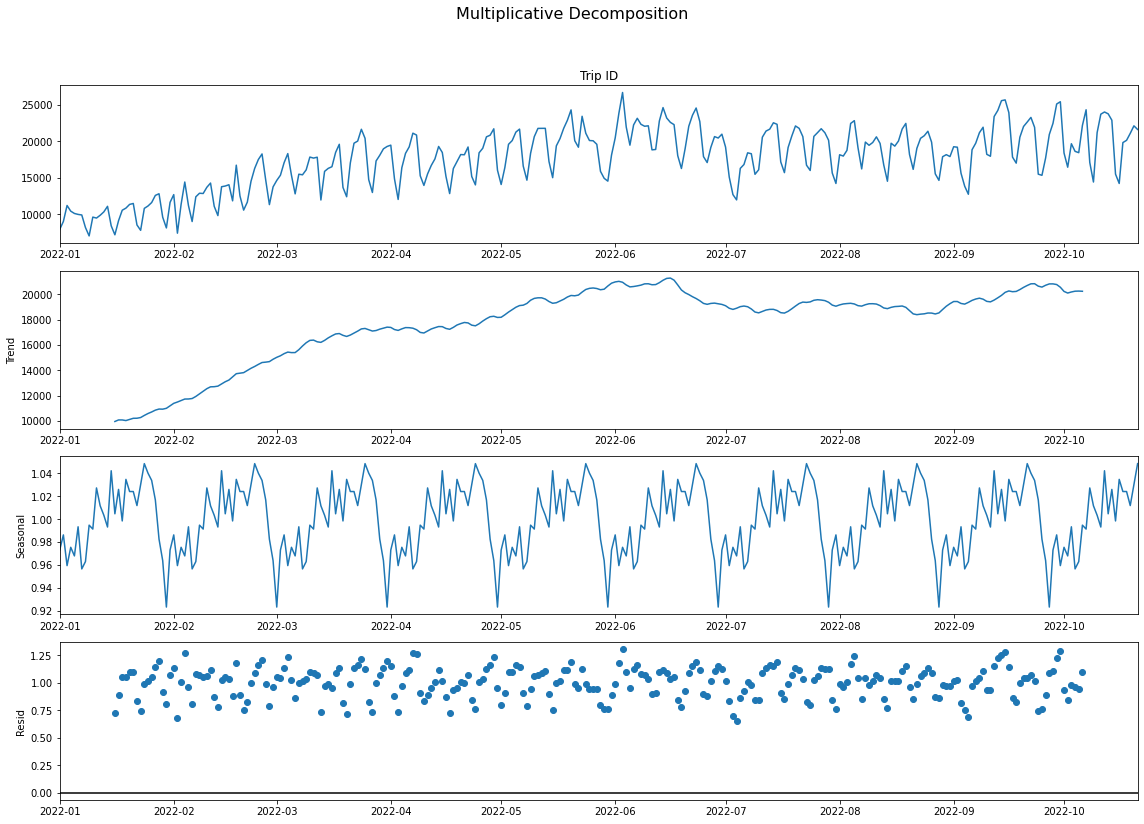

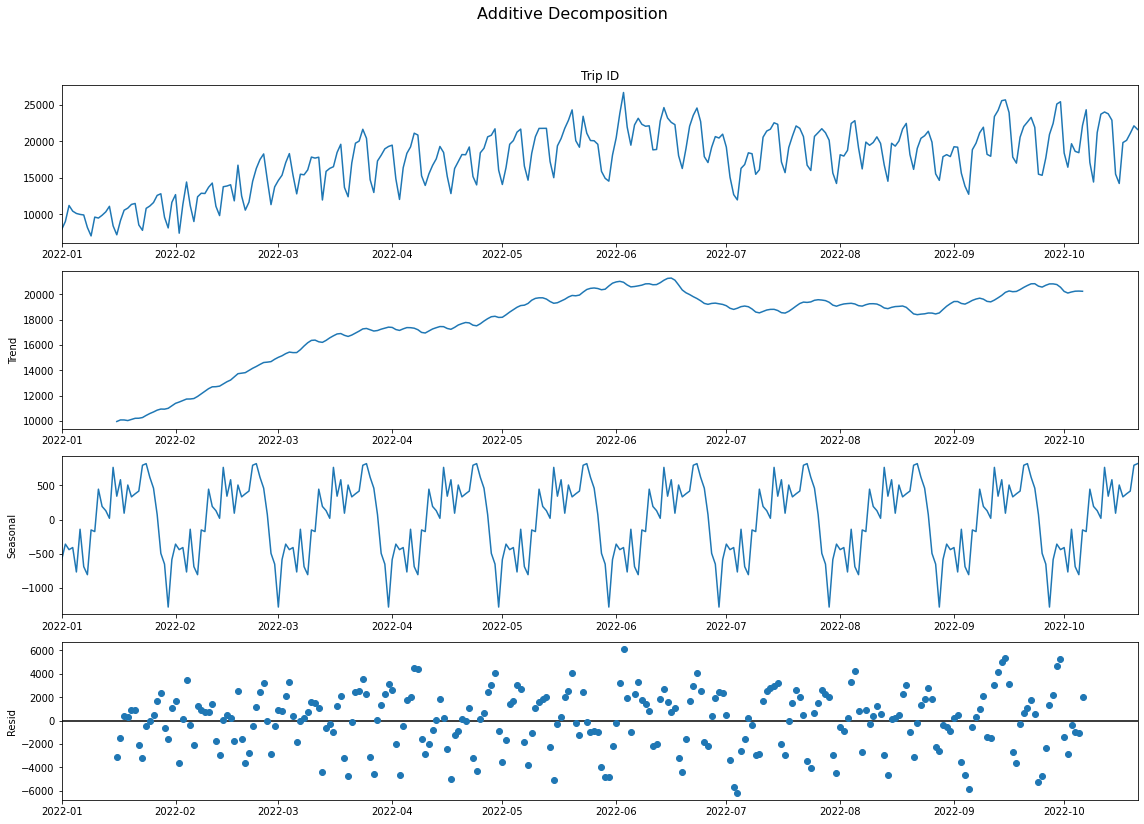

In [ ]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(dd['Trip ID'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(dd['Trip ID'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

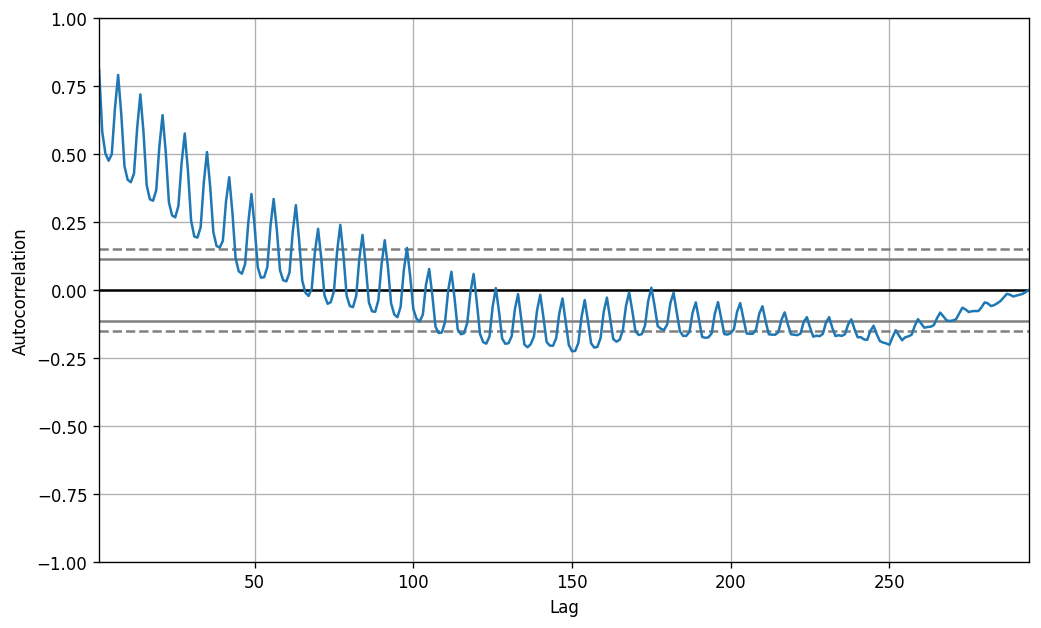

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(dd['Trip ID'].tolist())

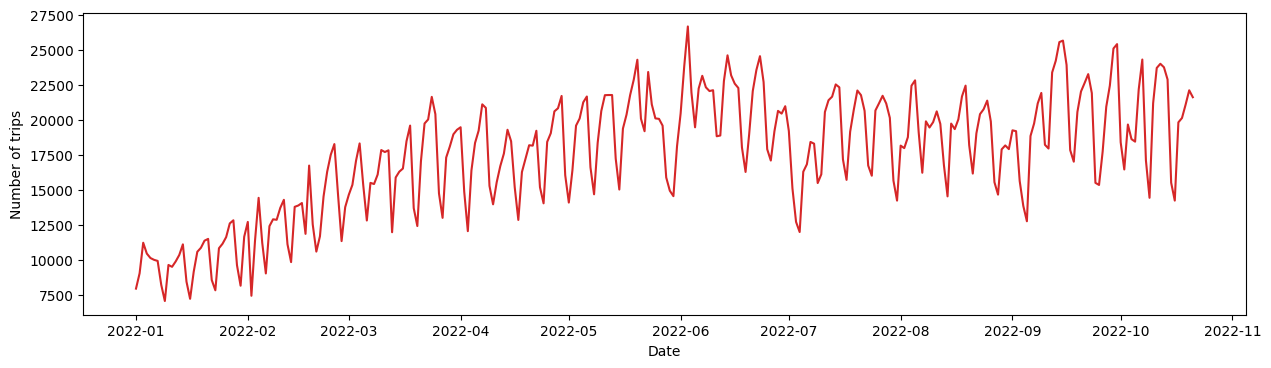

In [ ]:
plot_df(dd, x=dd.index, y=dd['Trip ID'])

In [ ]:
dd.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='Trip Start Timestamp', length=294, freq='D')

In [ ]:
# create 12 month moving average
dd['MA30'] = dd['Trip ID'].rolling(30).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(dd, x=dd.index, y=['Trip ID','MA30'], template = 'plotly_dark')
fig.show()

In [ ]:
dd.tail

<bound method NDFrame.tail of Trip Start Timestamp
2022-01-01     7939
2022-01-02     9031
2022-01-03    11214
2022-01-04    10440
2022-01-05    10124
              ...  
2022-10-17    19806
2022-10-18    20116
2022-10-19    21066
2022-10-20    22094
2022-10-21    21600
Freq: D, Name: Trip ID, Length: 294, dtype: int64>

In [ ]:
dd=dd['Trip ID']

In [ ]:
dd

Trip Start Timestamp
2022-01-01     7939
2022-01-02     9031
2022-01-03    11214
2022-01-04    10440
2022-01-05    10124
              ...  
2022-10-17    19806
2022-10-18    20116
2022-10-19    21066
2022-10-20    22094
2022-10-21    21600
Freq: D, Name: Trip ID, Length: 294, dtype: int64

In [ ]:
from pycaret.time_series import *
s = setup(dd, fh=1, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 4221
INFO:logs:self.variable_keys: {'memory', 'variable_keys', 'exp_id', 'experiment__', '_all_metrics', '_all_models_internal', 'y_train', 'log_plots_param', 'X_train_transformed', 'all_sp_values', 'y_transformed', 'master_model_container', 'y_test', 'data', 'logging_param', '_available_plots', 'X_train', 'gpu_param', 'idx', 'pipeline', 'seasonal_period', 'exp_name_log', 'X_transformed', 'USI', 'strictly_positive', 'y', 'y_test_transformed', 'display_container', 'fh', 'X', 'seasonality_present', 'index_type', 'fold_param', 'exogenous_present', 'enforce_exogenous', 'X_test_transformed', '_gpu_n_jobs_param', '_ml_usecase', 'html_param', 'X_test', 'enforce_pi', 'n_jobs_param', 'fold_groups_param_full', 'approach_type', 'seed', 'fold_generator', 'primary_sp_to_use', 'y_train_transformed', '_

,Description,Value
0,session_id,123
1,Target,Trip ID
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(294, 1)"
5,Train data shape,"(293, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.45s...............


In [ ]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,TT (Sec)
exp_smooth,Exponential Smoothing,285.1954,285.1954,0.0138,0.0138,0.1563,0.1157,0.3333
theta,Theta Forecaster,452.0915,452.0915,0.022,0.0218,0.2478,0.1834,0.1567
auto_arima,Auto ARIMA,480.3773,480.3773,0.0235,0.023,0.2635,0.195,18.9600
ets,ETS,492.9714,492.9714,0.0241,0.0238,0.2703,0.2,0.1900
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,505.6096,505.6096,0.0243,0.024,0.277,0.2051,0.1267
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,527.3906,527.3906,0.0259,0.0252,0.2893,0.2141,0.2533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,568.188,568.188,0.0277,0.027,0.3116,0.2306,0.1433
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,685.3761,685.3761,0.0334,0.0324,0.3759,0.2781,0.1433
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,688.8225,688.8225,0.0338,0.0327,0.3779,0.2796,0.3467
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,718.3117,718.3117,0.0352,0.0339,0.394,0.2916,0.1467


INFO:logs:master_model_container: 29
INFO:logs:display_container: 2
INFO:logs:ExponentialSmoothing(seasonal='mul', sp=7, trend='add')
INFO:logs:compare_models() successfully completed......................................


In [ ]:
df = pull()

In [ ]:
best

ExponentialSmoothing(seasonal='mul', sp=7, trend='add')

In [ ]:
drugi=create_model('xgboost_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-09-21,1701.8395,2046.9854,0.0902,0.0857,0.9515,0.8322,0.6570
1,2022-10-01,1546.2516,2089.7200,0.0885,0.0818,0.8594,0.8520,0.5311
2,2022-10-11,1151.4249,1615.3301,0.0656,0.0611,0.6332,0.6566,0.7321
Mean,NaT,1466.5053,1917.3452,0.0814,0.0762,0.8147,0.7803,0.6401
SD,NaT,231.6731,214.2684,0.0112,0.0108,0.1337,0.0878,0.0829


INFO:logs:master_model_container: 30
INFO:logs:display_container: 4
INFO:logs:BaseCdsDtForecaster(regressor=XGBRegressor(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                     

In [ ]:
dt.tail

<bound method NDFrame.tail of                       Trip ID  Taxi ID  Trip End Timestamp
Trip Start Timestamp                                      
2022-01-01               7939     7938                7939
2022-01-02               9031     9031                9030
2022-01-03              11214    11213               11213
2022-01-04              10440    10438               10440
2022-01-05              10124    10123               10124
...                       ...      ...                 ...
2022-10-27              21300    21299               21300
2022-10-28              19106    19105               19105
2022-10-29              13850    13850               13850
2022-10-30              12118    12118               12118
2022-10-31              14468    14468               14468

[304 rows x 3 columns]>

In [ ]:
predict_model(best , fh = 11)

,y_pred
2022-10-21,21751.9854
2022-10-22,16713.7588
2022-10-23,15631.3723
2022-10-24,19272.3467
2022-10-25,20227.1231
2022-10-26,20645.3345
2022-10-27,21736.1232
2022-10-28,21399.6629
2022-10-29,16442.4138
2022-10-30,15377.0097


In [ ]:
dt.tail(10)

,Trip ID,Taxi ID,Trip End Timestamp
Trip Start Timestamp,,,
2022-10-22,17878,17874,17876
2022-10-23,17645,17643,17645
2022-10-24,24058,24058,24058
2022-10-25,23635,23635,23635
2022-10-26,23314,23314,23314
2022-10-27,21300,21299,21300
2022-10-28,19106,19105,19105
2022-10-29,13850,13850,13850
2022-10-30,12118,12118,12118


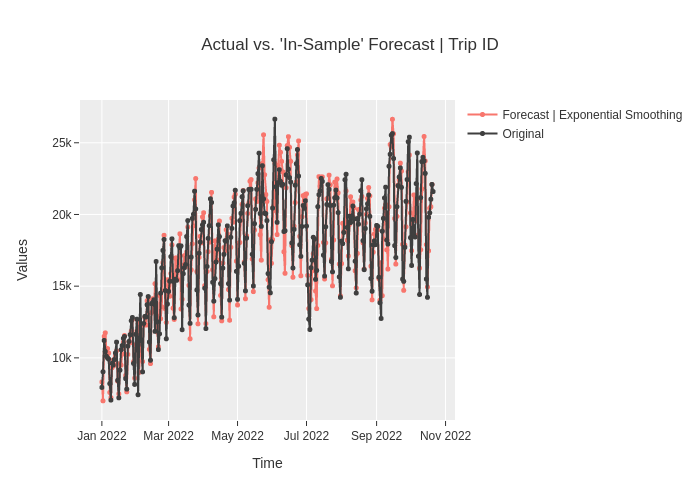

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(best, plot = 'insample')

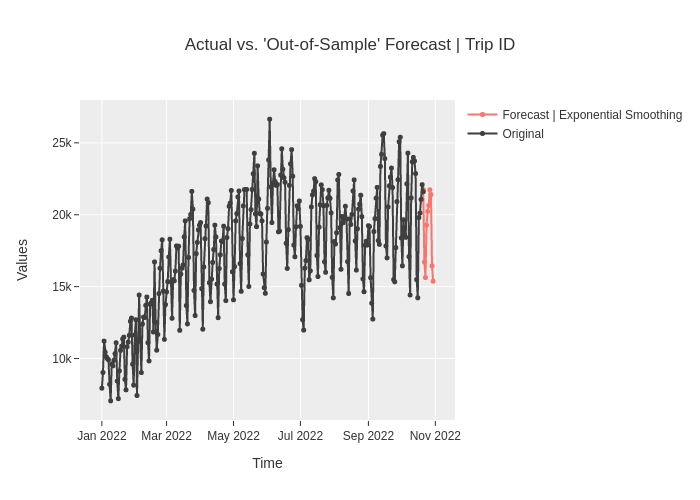

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh': 10})

In [ ]:
# Extract month and year from dates
dd['Month'] = [i.month for i in dd.index]
dd['Day'] = [i.day for i in dd.index]
# Create a sequence of numbers
dd['Series'] = np.arange(1,len(dd)+1)
# Drop unnecessary columns and re-arrange

dd = dd[['Series', 'Month','Day','Trip ID']] 
# Check the head of the dataset
dd.head()

,Series,Month,Day,Trip ID
Trip Start Timestamp,,,,
2022-01-01,1,1,1,7939
2022-01-02,2,1,2,9031
2022-01-03,3,1,3,11214
2022-01-04,4,1,4,10440
2022-01-05,5,1,5,10124


In [ ]:
dd.dtypes

Series     int64
Month      int64
Day        int64
Trip ID    int64
dtype: object

In [ ]:
# Split data into train-test set
train = dd[dd['Month'] < 10]
test = dd[dd['Month'] >= 10]
# Check shape
train.shape, test.shape

((273, 4), (31, 4))

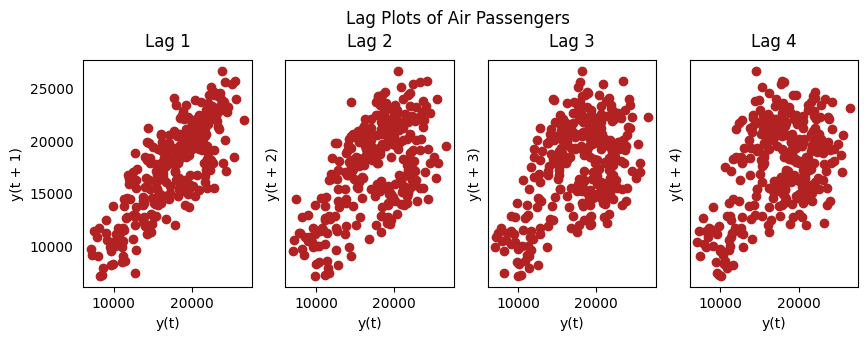

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(dd['Trip ID'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

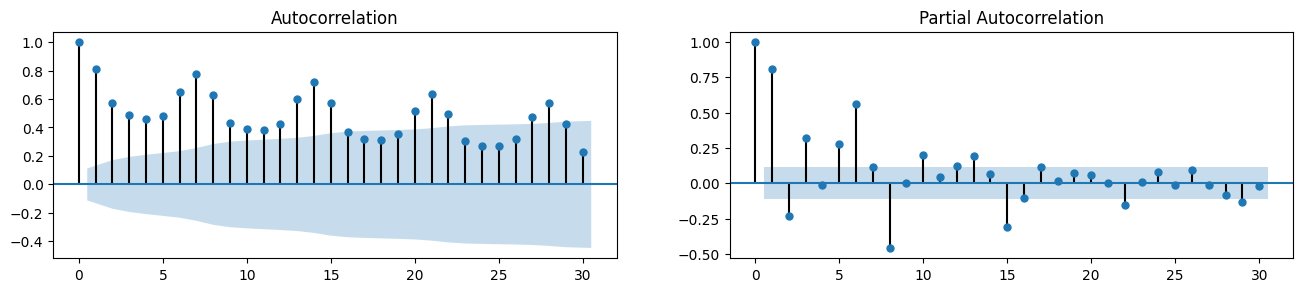

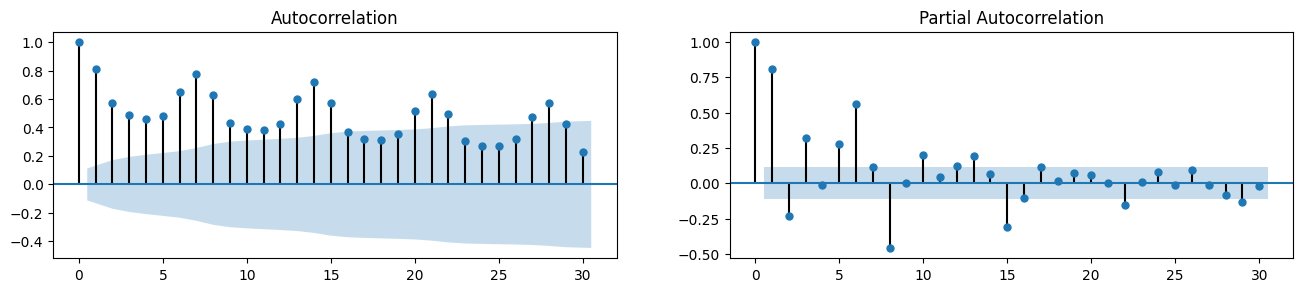

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dd['Trip ID'].tolist(), lags=30, ax=axes[0])
plot_pacf(dd['Trip ID'].tolist(), lags=30, ax=axes[1])

In [ ]:
df=taxi_3.groupby(pd.Grouper(key="Trip Start Timestamp", freq="15min")).count()

In [ ]:
df=df[:-10]

In [ ]:
df=df[['Trip ID']]

In [ ]:
plot_df(df, x=df.index, y=df['Trip ID'], title='Number of US Airline passengers from 1949 to 1960')

NameError: ignored

In [ ]:
df[['Trip ID']].mean()

Trip ID    182.527918
dtype: float64

In [ ]:
from pycaret.time_series import *
s = setup(df, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 581c
INFO:logs:self.variable_keys: {'idx', '_available_plots', 'gpu_param', 'y', 'all_sp_values', 'master_model_container', 'strictly_positive', 'y_train', 'memory', 'fold_groups_param_full', 'y_train_transformed', 'seed', '_all_models', 'X', 'enforce_pi', 'log_plots_param', '_all_models_internal', 'experiment__', 'USI', 'variable_keys', '_ml_usecase', 'n_jobs_param', 'fold_param', 'exp_name_log', 'X_test_transformed', 'approach_type', 'data', 'X_test', 'y_transformed', 'X_train_transformed', 'exogenous_present', 'html_param', 'enforce_exogenous', 'y_test', 'pipeline', 'display_container', 'fh', 'primary_sp_to_use', '_all_metrics', 'index_type', 'seasonality_present', '_gpu_n_jobs_param', 'exp_id', 'X_transformed', 'X_train', 'y_test_transformed', 'fold_generator', 'seasonal_period', 'log

,Description,Value
0,session_id,123
1,Target,Trip ID
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(29175, 1)"
5,Train data shape,"(29174, 1)"
6,Test data shape,"(1, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.67s...............
